In [ ]:
!unzip clip-art.zip

## pre-installation

restart runtime afterwards

In [ ]:
# @title Installation
#@markdown restart runtime afterwards

# CLIPDraw
%cd /content/
!pip install svgwrite
!pip install svgpathtools
!pip install cssutils
!pip install numba
!pip install torch-tools
!pip install visdom

!git clone https://github.com/BachiLi/diffvg
%cd diffvg
# !ls
!git submodule update --init --recursive
!python setup.py install
%cd /content/

# VQGan + CLIP
!git clone https://github.com/CompVis/taming-transformers.git
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops    

# CLIP
!pip install git+https://github.com/openai/CLIP.git

# Clip-art
!pip install /content/clip-art
# !pip install git+https://github.com/samacqua/clip_art --log log_file.txt

In [6]:
!pip install /content/clip-art
# !pip install git+https://github.com/samacqua/clip_art --log log_file.txt

Processing ./clip-art
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for clip-art: filename=clip_art-0.0-py3-none-any.whl size=18946 sha256=011d1daaa8a558bda25b6edd00a5e46d9783bad17019a952e607fdfe8922ac14
  Stored in directory: /root/.cache/pip/wheels/d9/4a/ab/b483914e33a68d358cd5d6263b157e5f570217688200fe9dfe
Successfully built clip-art
  Attempting uninstall: clip-art
    Found existing installation: clip-art 0.0
    Uninstalling clip-art-0.0:
      Successfully uninstalled clip-art-0.0


In [1]:
# @title import libraries
import torch
import clipdraw
import clip
import vqganclip
import os

In [2]:
# @title load CLIP
device = torch.device('cuda:0')

clip_model, preprocess = clip.load('ViT-B/32', device, jit=False)
for param in clip_model.parameters():
    param.requires_grad = False

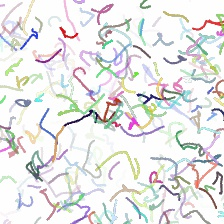

render loss: -0.7373046875
iteration: 0

Top predictions:

      processing: 3.95%
        particle: 2.47%
        software: 1.39%
            node: 1.34%
     parentheses: 0.98%


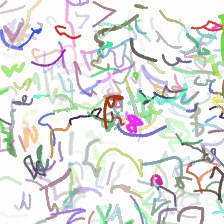

render loss: -1.1240234375
iteration: 10

Top predictions:

          forest: 5.56%
      wilderness: 3.82%
           trail: 2.47%
            cave: 2.32%
           climb: 2.25%


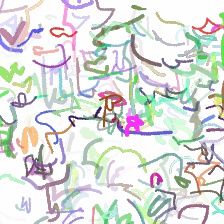

render loss: -1.189453125
iteration: 20

Top predictions:

          forest: 3.31%
            park: 3.06%
           trail: 2.34%
            walk: 2.10%
            farm: 1.94%


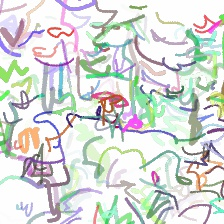

render loss: -1.3056640625
iteration: 30

Top predictions:

            walk: 6.85%
          forest: 5.34%
           field: 2.90%
             run: 2.52%
            fall: 2.09%


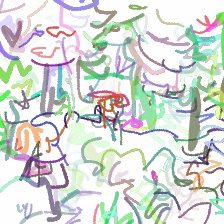

render loss: -1.353515625
iteration: 40

Top predictions:

            walk: 13.96%
          forest: 9.16%
          summer: 3.07%
         jogging: 1.67%
             run: 1.38%


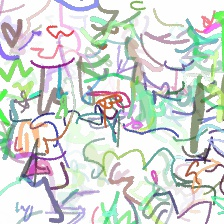

render loss: -1.396484375
iteration: 50

Top predictions:

            walk: 14.05%
          forest: 9.22%
           trail: 2.85%
         fairies: 1.99%
            park: 1.90%


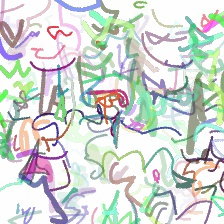

render loss: -1.400390625
iteration: 60

Top predictions:

            walk: 32.96%
         jogging: 6.70%
          forest: 5.82%
             run: 3.64%
           trail: 3.21%


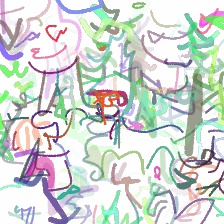

render loss: -1.4453125
iteration: 70

Top predictions:

            walk: 42.58%
         jogging: 17.20%
             run: 4.93%
           trail: 4.56%
          forest: 2.72%


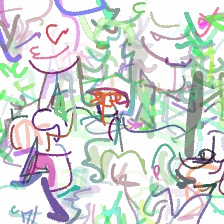

render loss: -1.4423828125
iteration: 80

Top predictions:

            walk: 12.04%
          forest: 10.46%
             run: 4.57%
         jogging: 3.04%
          summer: 2.09%


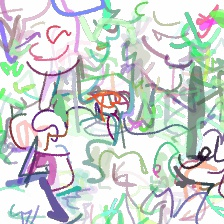

render loss: -1.4873046875
iteration: 90

Top predictions:

            walk: 39.87%
          forest: 6.31%
             run: 4.76%
         jogging: 4.40%
           trail: 2.55%


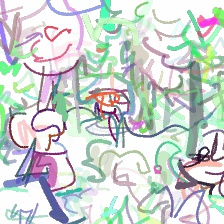

render loss: -1.4921875
iteration: 100

Top predictions:

            walk: 39.70%
         jogging: 9.88%
             run: 6.79%
          forest: 4.25%
           trail: 3.01%


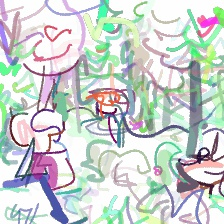

render loss: -1.5107421875
iteration: 110

Top predictions:

            walk: 32.59%
             run: 15.39%
         jogging: 14.47%
          forest: 4.92%
           trail: 3.71%


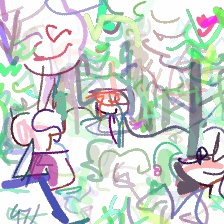

render loss: -1.560546875
iteration: 120

Top predictions:

            walk: 40.65%
         jogging: 23.17%
             run: 16.94%
          forest: 2.68%
           trail: 1.81%


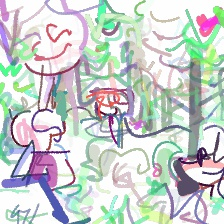

render loss: -1.5625
iteration: 130

Top predictions:

            walk: 21.56%
          forest: 5.12%
             run: 4.45%
         jogging: 3.06%
          family: 1.44%


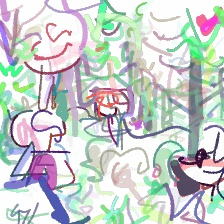

render loss: -1.5859375
iteration: 140

Top predictions:

            walk: 42.48%
         jogging: 22.74%
             run: 12.56%
          forest: 2.47%
           trail: 1.37%


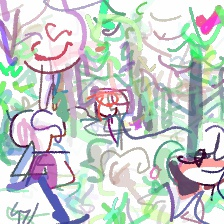

render loss: -1.6171875
iteration: 150

Top predictions:

            walk: 50.20%
         jogging: 12.30%
             run: 10.53%
           trail: 2.50%
          forest: 1.83%


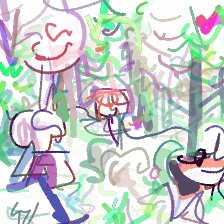

render loss: -1.630859375
iteration: 160

Top predictions:

            walk: 39.62%
         jogging: 9.12%
          forest: 6.57%
             run: 5.53%
           trail: 2.46%


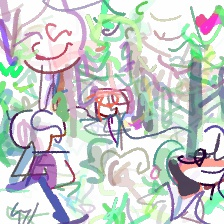

render loss: -1.609375
iteration: 170

Top predictions:

          forest: 16.35%
            walk: 15.36%
             run: 5.83%
            wood: 2.18%
           trail: 2.08%


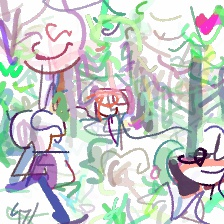

render loss: -1.5947265625
iteration: 180

Top predictions:

            walk: 52.93%
         jogging: 25.78%
             run: 7.62%
          forest: 1.13%
           trail: 1.08%


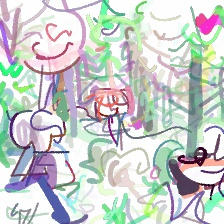

render loss: -1.6494140625
iteration: 190

Top predictions:

            walk: 24.90%
          forest: 18.80%
           trail: 6.60%
             run: 3.64%
         jogging: 2.79%


In [5]:
# @title make sure CLIPDraw works
prompt = 'a happy walk in the forest'
num_paths=256
num_iter=200
max_width=50
use_normalized_clip=True
exp_size=300
n_save=1
exp_dir='clipdraw_out'
clipdraw.clip_draw_render(clip_model, prompt=prompt,num_paths=num_paths,
                          num_iter=num_iter, max_width=max_width, use_normalized_clip=True,
                          exp_size=exp_size, n_save=n_save, exp_dir=exp_dir)

In [6]:
model_name = 'vqgan_imagenet_f16_16384'
pretrained_name = 'imagenet_16384'
vqganclip.download_pretrained_gan(pretrained_name)

In [10]:
vqganclip.run(clip_model, prompt=prompt, width=exp_size, height=exp_size, init_image='clipdraw_out/final.png')

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_16384.ckpt


RuntimeError: ignored